# カーネル近似による分類

In [151]:
!pip install mlxtend

In [152]:
# 1：ライブラリのインポート--------------------------------
#numpyという行列などを扱うライブラリを利用
import numpy as np
#pandasというデータ分析ライブラリを利用
import pandas as pd
#プロット用のライブラリを利用
import matplotlib.pyplot as plt
#機械学習用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, model_selection
#学習結果をプロットする外部ライブラリを利用
from mlxtend.plotting import plot_decision_regions

## Check XOR data by SGD

In [153]:
# 2：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor = np.random.randn(200,2) 
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,0)

In [154]:
X_xor

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [155]:
y_xor

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0])

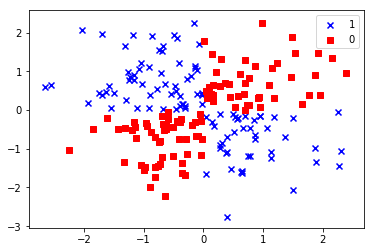

In [156]:
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show()

In [157]:
# 4：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

In [158]:
# 5：機械学習で分類する---------------------------------------------------
#loss="hinge", loss="log"
clf_result=linear_model.SGDClassifier(loss="hinge")
clf_result.fit(X_std, z)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [159]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=model_selection.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.5490350877192983
正解率の標準偏差 =  0.08480913882183234


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

In [160]:
# 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=model_selection.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)

正答率 =  0.45


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


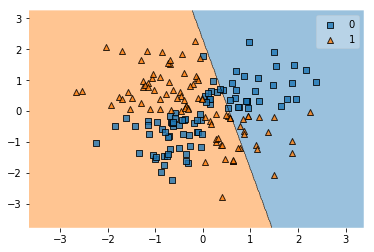

In [161]:
#学習データをプロット
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) 

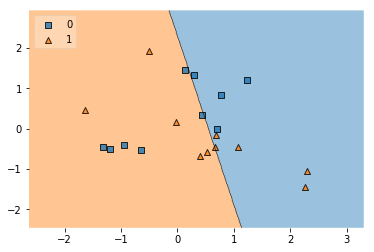

In [162]:
#テストデータをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2)

## Check XOR data by kernel approximation

In [163]:
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

<function matplotlib.pyplot.show(*args, **kw)>

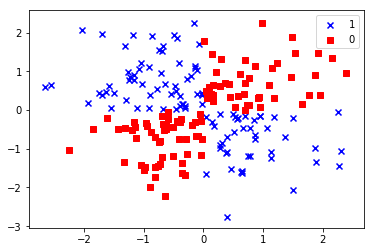

In [164]:
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [165]:
# 4：データの整形-------------------------------------------------------
X_std = X_xor
z = y_xor

In [166]:
# 解説 5：カーネル近似を適用する------------------------------------------
rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=1)
 
X_std = rbf_feature.fit_transform(X_std)
print("X_stdの大きさ ", pd.DataFrame(X_std).shape)
#pd.DataFrame(X_std).to_clipboard() #これでクリップボードに保持できるのでエクセルに貼れる

X_stdの大きさ  (200, 100)


In [167]:
# 6：機械学習で分類する---------------------------------------------------
#loss="hinge", loss="log"
clf_result = linear_model.SGDClassifier(loss="hinge")

In [168]:
# 7：K分割交差検証（cross validation）で性能を評価する---------------------
scores = model_selection.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8959022556390976
正解率の標準偏差 =  0.07539866156697955


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

In [169]:
# 8：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label = model_selection.train_test_split(X_std,z, test_size=0.1, random_state=1)
clf_result.fit(X_train, train_label)

#正答率を求める
pre = clf_result.predict(X_test)
ac_score = metrics.accuracy_score(test_label, pre)
print("正答率 = ", ac_score)

正答率 =  0.8


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [196]:
a = np.array([0, 1, 2, 3])
b = np.array([0, 4, 5, 6])
aa, bb = np.meshgrid(a, b)
print(aa)
print(bb)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]]


(300, 300)
(300, 300)

[[-3.   -3.  ]
 [-2.98 -3.  ]
 [-2.96 -3.  ]
 ...
 [ 2.94  2.98]
 [ 2.96  2.98]
 [ 2.98  2.98]]

[1 1 1 ... 0 0 0]


<function matplotlib.pyplot.show(*args, **kw)>

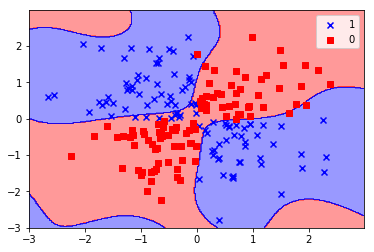

In [206]:
# 解説 9：Plotする
x1_min, x1_max, x2_min, x2_max = -3, 3, -3, 3
resolution = 0.02
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
print(xx1.shape)
print(xx2.shape)
print()

X = (np.array([xx1.ravel(), xx2.ravel()]).T)
print(X)
print()

plot_z = clf_result.predict(rbf_feature.fit_transform(X))
print(plot_z)

colors = ('red','blue')
cmap = ListedColormap(colors[:len(np.unique(plot_z))])
plot_z = plot_z.reshape(xx1.shape)
plt.contourf(xx1, xx2, plot_z, alpha=0.4, cmap=cmap)

# XORデータのプロット
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show